In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from CLASSO_modified.classo import *
from sklearn.preprocessing import StandardScaler
import time
import os
import random

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

/gpfs/ycga/project/christakis/ajp65/conda_envs/TwinsUK/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# m,  d,  d_nonzero,  k, sigma = 100, 200, 5, 0, 0.5
# (X_, C_, y_), sol = random_data(m, d, d_nonzero, k, sigma, zerosum = True, seed = 4)
# X_
tax = pd.read_csv('0.001_percent_total_tax_table.csv')
tax.iloc[83, :]


Unnamed: 0    AAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGTG...
Kingdom                                                Bacteria
Phylum                                               Firmicutes
Class                                                Clostridia
Order                                             Clostridiales
Family                                          Ruminococcaceae
Genus                                                       NaN
Species                                                     NaN
Name: 83, dtype: object

In [3]:
TAX_list = []
TAX_001 = pd.read_csv('0.001_percent_total_tax_table.csv')
for i in range(0, TAX_001.shape[0]):
    for j in range(0, TAX_001.shape[1]):
        if (pd.isna(TAX_001.iloc[i, j])):
            TAX_list.append(TAX_001.iloc[i, j-1])
            break
        elif (j == 7):
            TAX_list.append(TAX_001.iloc[i, j-1] + " " + TAX_001.iloc[i, j])
TAX_list_df = pd.DataFrame(TAX_list)
TAX_list_df.to_csv('0.001_percent_total_tax_list_noNAN.csv', index=False)
TAX_list_df

,0
0,Bacteroides vulgatus
1,Bacteroides
2,Bacteroides uniformis
3,Akkermansia muciniphila
4,Agathobacter
...,...
1217,Subdoligranulum
1218,Streptococcus anginosus
1219,Lachnospiraceae
1220,Escherichia/Shigella coli


In [4]:
# tax_list = pd.read_csv('0.001_percent_total_tax_list_noNAN.csv')
# list(tax_list.T.to_numpy()[0])

HEX_Honesty_Humility_corrected_R3-StabSel.png


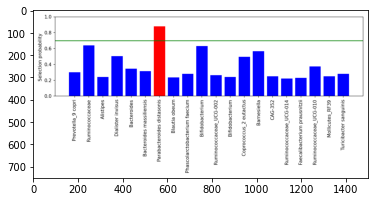

Hex_Sincerity_corrected_R3-StabSel.png


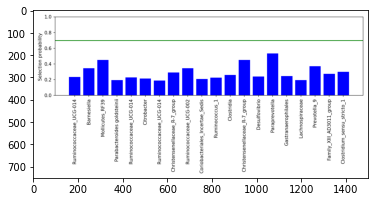

Hex_Prudence_corrected_R3-StabSel.png


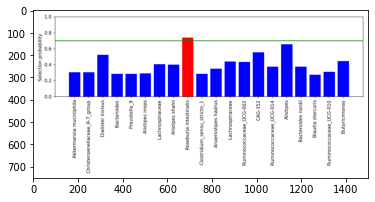

HEX_Emotionality_corrected_R3-StabSel.png


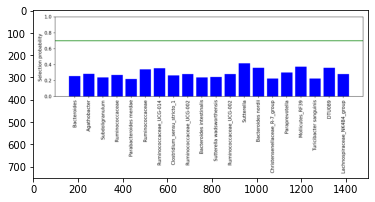

Hex_Perfectionism_corrected_R3-StabSel.png


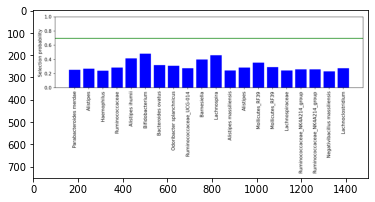

Hex_Social_Self_Esteem_corrected_R3-StabSel.png


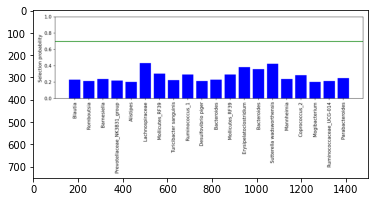

Hex_Fearfulness_corrected_R3-StabSel.png


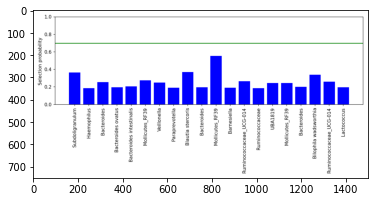

Hex_Patience_corrected_R3-StabSel.png


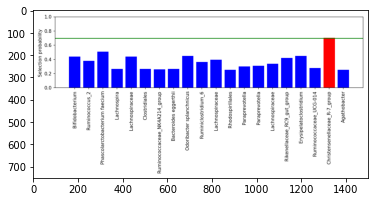

Hex_Unconventionality_corrected_R3-StabSel.png


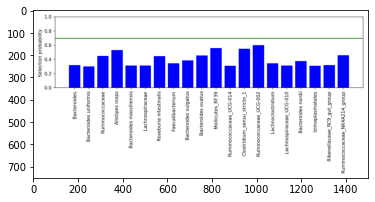

Hex_Aesthetic_Appreciation_corrected_R3-StabSel.png


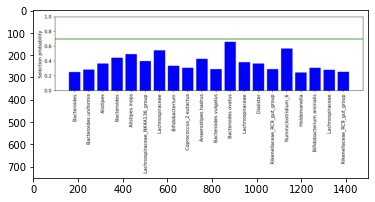

Hex_Social_Boldness_corrected_R3-StabSel.png


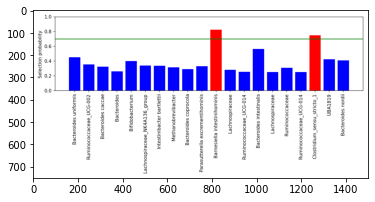

Hex_Greed_Avoidance_corrrected_R3-StabSel.png


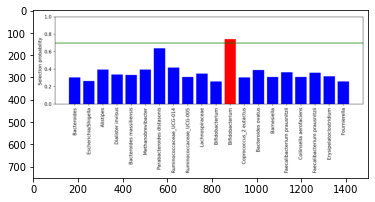

HEX_Agreeableness_corrected_R3-StabSel.png


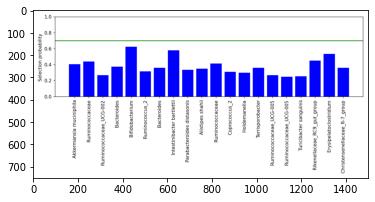

Hex_Organization_corrected_R3-StabSel.png


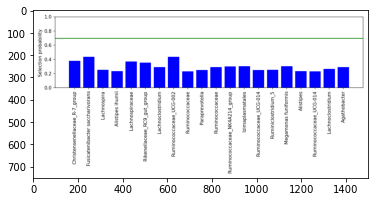

HEX_Conscientiousness_corrected_R3-StabSel.png


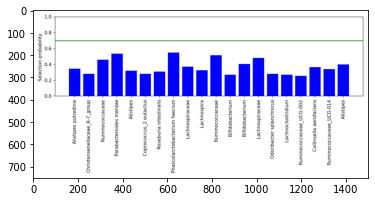

Hex_Gentleness_corrected_R3-StabSel.png


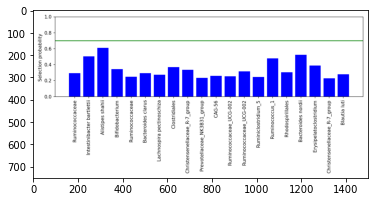

HEX_Extraversion_corrected_R3-StabSel.png


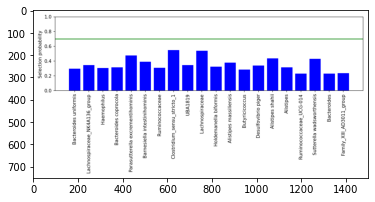

Hex_Liveliness_corrected_R3-StabSel.png


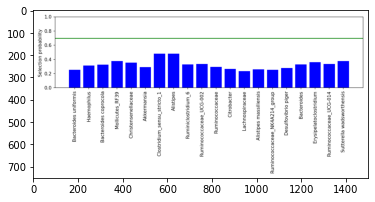

Hex_Inquistiveness_corrected_R3-StabSel.png


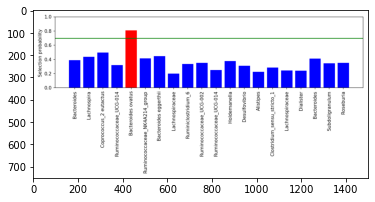

Hex_Sentimentality_corrected_R3-StabSel.png


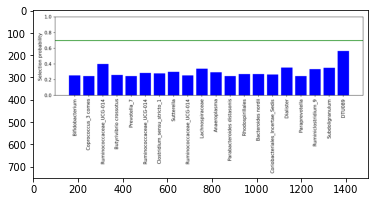

Hex_Forgiveness_corrected_R3-StabSel.png


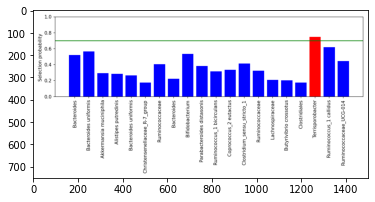

Hex_Diligence_corrected_R3-StabSel.png


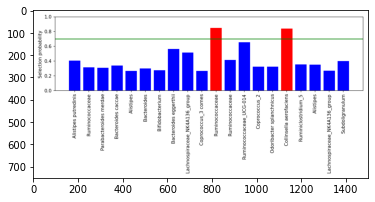

Hex_Modesty_corrected_R3-StabSel.png


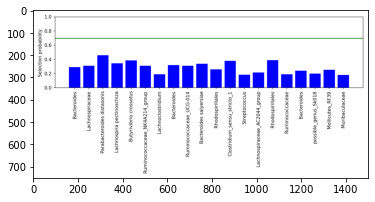

Hex_Flexibility_corrected_R3-StabSel.png


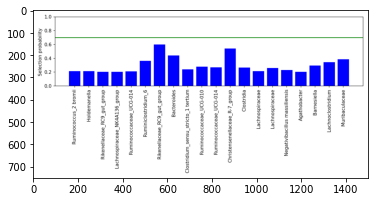

Hex_Anxiety_corrected_R3-StabSel.png


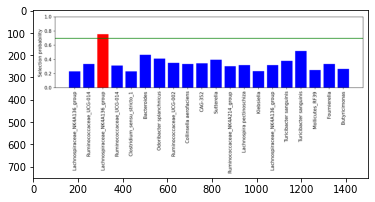

HEX_Openness_corrected_R3-StabSel.png


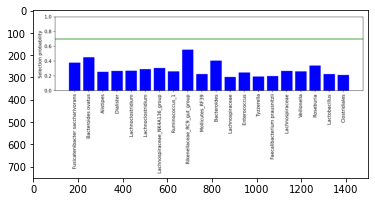

Hex_Creativity_corrected_R3-StabSel.png


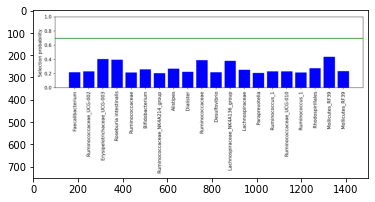

Hex_Dependence_corrected_R3-StabSel.png


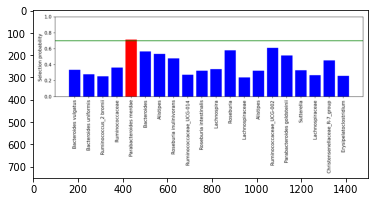

Hex_Sociability_corrected_R3-StabSel.png


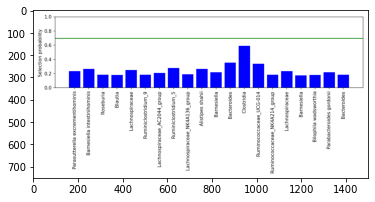

Hex_Fairness_corrected_R3-StabSel.png


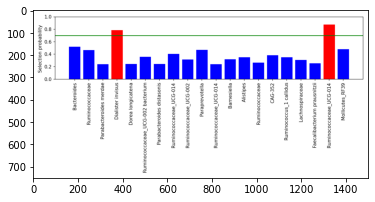

In [4]:
png_names = os.listdir('./CLASSO_001_t07_qtheoretical_label_withPCs/')
for pic in png_names:
    print(pic)
    img = mpimg.imread('./CLASSO_001_t07_qtheoretical_label_withPCs/'+ pic)
    imgplot = plt.imshow(img)
    plt.show()


In [9]:
# import pandas as pd
# import numpy as np
# import os
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.preprocessing import StandardScaler
arr_ = [0.01, 0.005, 0.02, 0.005, 0.06, 0.005, 0.005, 0.005, 0.04, 0.015, 0.055, 0.005, 0.015, 0.32, 0.01, 0.005, 0.005, 0.1, 0.01, 0.025, 0.015, 0.075, 0.02, 0.005, 0.015, 0.01, 0.015, 0.01, 0.04, 0.005, 0.04, 0.03, 0.02, 0.005, 0.005, 0.12, 0.005, 0.01, 0.095, 0.05, 0.105, 0.055, 0.01, 0.04, 0.015, 0.06, 0.005, 0.015, 0.045, 0.025, 0.035, 0.05, 0.005, 0.02, 0.025, 0.005, 0.055, 0.055, 0.085, 0.03, 0.005, 0.02, 0.045, 0.005, 0.01, 0.035, 0.01, 0.01, 0.035, 0.095, 0.02, 0.02, 0.005, 0.02, 0.08, 0.01, 0.01, 0.025, 0.02, 0.31, 0.005, 0.005, 0.02, 0.015, 0.11, 0.015, 0.03, 0.05, 0.035, 0.01, 0.02, 0.015, 0.015, 0.005, 0.005, 0.005, 0.01, 0.13, 0.2, 0.205, 0.08, 0.005, 0.005, 0.015, 0.02, 0.005, 0.02, 0.225, 0.015, 0.02, 0.01, 0.05, 0.085, 0.02, 0.03, 0.01, 0.035, 0.01, 0.005, 0.03, 0.065, 0.05, 0.025, 0.015, 0.07, 0.01, 0.055, 0.01, 0.045, 0.195, 0.01, 0.015, 0.065, 0.02, 0.07, 0.025, 0.045, 0.01, 0.09, 0.005, 0.04, 0.015, 0.02, 0.01, 0.015, 0.045, 0.015, 0.035, 0.05, 0.005, 0.015, 0.03, 0.035, 0.025, 0.22, 0.025, 0.01, 0.01, 0.035, 0.085, 0.16, 0.025, 0.05, 0.015, 0.04, 0.08, 0.015, 0.02, 0.01, 0.005, 0.005, 0.01, 0.025, 0.01, 0.02, 0.065, 0.03, 0.005, 0.01, 0.035, 0.005, 0.095, 0.015, 0.01, 0.035, 0.01, 0.01, 0.015, 0.005, 0.015, 0.035, 0.005, 0.035, 0.015, 0.03, 0.07, 0.09, 0.005, 0.22, 0.08, 0.005, 0.01, 0.02, 0.03, 0.025, 0.01, 0.08, 0.065, 0.015, 0.05, 0.015, 0.01, 0.005, 0.005, 0.02, 0.015, 0.005, 0.005, 0.045, 0.07, 0.035, 0.03, 0.015, 0.025, 0.005, 0.02, 0.035, 0.02, 0.155, 0.005, 0.01, 0.005, 0.01, 0.06, 0.005, 0.005, 0.02, 0.015, 0.005, 0.515, 0.11, 0.02, 0.005, 0.035, 0.14, 0.19, 0.01, 0.01, 0.005, 0.025, 0.01, 0.025, 0.235, 0.13, 0.135, 0.015, 0.04, 0.03, 0.005, 0.005, 0.01, 0.01, 0.01, 0.015, 0.03, 0.015, 0.01, 0.03, 0.01, 0.02, 0.02, 0.02, 0.02, 0.025, 0.1, 0.02, 0.04, 0.1, 0.005, 0.02, 0.005, 0.06, 0.03, 0.02, 0.005, 0.005, 0.035, 0.01, 0.01, 0.36, 0.155, 0.045, 0.02, 0.01, 0.025, 0.05, 0.125, 0.005, 0.04, 0.055, 0.13, 0.035, 0.02, 0.125, 0.025, 0.04, 0.06, 0.015, 0.055, 0.165, 0.01, 0.03, 0.01, 0.025, 0.17, 0.205, 0.035, 0.095, 0.055, 0.01, 0.01, 0.055, 0.015, 0.155, 0.015, 0.075, 0.04, 0.06, 0.025, 0.015, 0.06, 0.01, 0.04, 0.155, 0.015, 0.11, 0.015, 0.025, 0.005, 0.015, 0.005, 0.04, 0.05, 0.015, 0.11, 0.04, 0.025, 0.005, 0.02, 0.01, 0.115, 0.01, 0.005, 0.01, 0.005, 0.055, 0.02, 0.005, 0.015, 0.035, 0.01, 0.08, 0.005, 0.04, 0.015, 0.005, 0.085, 0.01, 0.06, 0.015, 0.005, 0.05, 0.025, 0.015, 0.005, 0.17, 0.035, 0.055, 0.04, 0.005, 0.02, 0.01, 0.01, 0.15, 0.105, 0.015, 0.175, 0.02, 0.01, 0.05, 0.065, 0.03, 0.01, 0.015, 0.005, 0.235, 0.035, 0.005, 0.065, 0.03, 0.005, 0.055, 0.02, 0.02, 0.005, 0.005, 0.01, 0.03, 0.01, 0.06, 0.025, 0.005, 0.015, 0.02, 0.06, 0.01, 0.01, 0.06, 0.02, 0.005, 0.005, 0.01, 0.015, 0.025, 0.02, 0.025, 0.005, 0.005, 0.01, 0.015, 0.035, 0.03, 0.04, 0.005, 0.01, 0.015, 0.005, 0.005, 0.035, 0.005, 0.025, 0.01, 0.025, 0.1, 0.025, 0.005, 0.015, 0.01, 0.065, 0.025, 0.015, 0.005, 0.035, 0.06, 0.07, 0.02, 0.045, 0.025, 0.015, 0.26, 0.015, 0.065, 0.01, 0.38, 0.045, 0.01, 0.005, 0.01, 0.01, 0.02, 0.125, 0.005, 0.005, 0.03, 0.035, 0.11, 0.005, 0.04, 0.015, 0.035, 0.16, 0.05, 0.005, 0.03, 0.08, 0.05, 0.04, 0.075, 0.005, 0.04, 0.01, 0.025, 0.005, 0.005, 0.005, 0.085, 0.035, 0.015, 0.01, 0.035, 0.015, 0.005, 0.005, 0.005, 0.235, 0.115, 0.01, 0.215, 0.035, 0.005, 0.005, 0.035, 0.005, 0.005, 0.005, 0.005, 0.015, 0.005, 0.005, 0.01, 0.02, 0.02, 0.005, 0.01, 0.01, 0.02, 0.035, 0.015, 0.045, 0.03, 0.01, 0.015, 0.005, 0.085, 0.02, 0.02, 0.035, 0.005, 0.015, 0.005, 0.005, 0.005, 0.03, 0.005, 0.02, 0.01, 0.045, 0.17, 0.105, 0.005, 0.005, 0.005, 0.015, 0.02, 0.01, 0.035, 0.025, 0.01, 0.03, 0.01, 0.02, 0.085, 0.025, 0.005, 0.13, 0.025, 0.01, 0.04, 0.005, 0.02, 0.005, 0.005, 0.015, 0.04, 0.02, 0.005, 0.045]
len(arr_)

577

In [ ]:
# ##names = np.array(['0HEX_Openness_corrected','1HEX_Conscientiousness_corrected','2HEX_Agreeableness_corrected','3HEX_Extraversion_corrected','HEX_Emotionality_corrected','HEX_Honesty_Humility_corrected','Hex_Sincerity_corrected','Hex_Fairness_corrected','Hex_Greed_Avoidance_corrrected','Hex_Modesty_corrected','Hex_Fearfulness_corrected','Hex_Anxiety_corrected','Hex_Dependence_corrected','Hex_Sentimentality_corrected','Hex_Social_Self_Esteem_corrected','Hex_Social_Boldness_corrected','Hex_Sociability_corrected','Hex_Liveliness_corrected','Hex_Forgiveness_corrected','Hex_Gentleness_corrected','Hex_Flexibility_corrected','Hex_Patience_corrected','Hex_Organization_corrected','Hex_Diligence_corrected','Hex_Perfectionism_corrected','Hex_Prudence_corrected','Hex_Aesthetic_Appreciation_corrected','Hex_Inquistiveness_corrected','Hex_Creativity_corrected','Hex_Unconventionality_corrected'])

# ## Read data
# X_df = pd.read_csv("20220325_CLASSO_X_001.csv", index_col = 0)
# X = X_df.to_numpy()
# Y_df = pd.read_csv("20220325_CLASSO_Y_001.csv", index_col = 0)
# Y = Y_df.to_numpy()
# C = np.load("20220325_CLASSO_C_001.npy")
# X.shape

# y = Y[:, 0][~np.isnan(Y[:, 0])]
# X = X[~np.isnan(Y[:, 0])]
# n, p = np.shape(X)

# # Code for new naming
# new_names = []
# for name in X_df.columns[0:int(np.sum(C))]:
#     genus = name.split('__')[0]
#     species = name.split('__')[1]
#     if (species != 'nan'):
#         new_names.append(genus + '__' + species)
#     else:
#         new_names.append(genus)
# new_names
# Y

In [2]:
filter_level = '001'

Y_df = pd.read_csv("20220413_CLASSO_Y_" + filter_level + "_withPCs.csv", index_col = 0)
Y_full = Y_df.to_numpy()

X_df = pd.read_csv("20220413_CLASSO_X_" + filter_level + "_withPCs.csv", index_col = 0)
X_full = X_df.to_numpy()

C = np.load("20220413_CLASSO_C_" + filter_level + "_withPCs.npy")
#     num_ASVs = int(np.sum(C))

# non_nan = ~np.isnan(Y_full[:, 5])
# y = Y_full[:, 5][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)
# X_design = X_df_.iloc[:, [51] + [i for i in range(1222, 1742)]]

X_full[:, 0:1222].shape

C[:, 0:1222]

array([[1., 1., 1., ..., 1., 1., 1.]])

In [3]:
## Function for printing R^2 for nested models

def print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df):
    print("R_squared portions for " + Y_df.columns[y_i])
    
    non_nan = ~np.isnan(Y_full[:, y_i])
    y = Y_full[:, y_i][non_nan]
    X = X_full[non_nan]
    X_df_ = pd.DataFrame(X)

    y = y - np.mean(y)
    print("y mean : ", np.mean(y))



    ## 1. Full model
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1742)]]
    label = np.concatenate([mb_names_s, np.array(['sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print('1. Full model summary                    : ', OLS_fit.summary())
    Full_model_R2 = OLS_fit.rsquared
    print("1. Full model R_squared                  : ", Full_model_R2)
    
    



    ## 2. Without microbiome
    X_design = X_df_.iloc[:, [i for i in range(1222, 1742)]]
    label = np.concatenate([np.array(['sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print("2. Without microbiome ASV change in R_squared      : ", Full_model_R2 - OLS_fit.rsquared)

    print("mb_i_s : ", mb_i_s)
    print("mb_names_s : ", mb_names_s)
    
    if (len(mb_i_s) > 1):
        for i in range(0, len(mb_i_s)):
            mb_i_s_tmp = [x for j, x in enumerate(mb_i_s) if j!=i]
            print(mb_i_s_tmp)
            X_design = X_df_.iloc[:, mb_i_s_tmp + [i for i in range(1222, 1742)]]
            label = np.concatenate([np.array([mb_names_s[i], 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
            X_design.columns = label

            OLS_model = sm.OLS(y, X_design)
            OLS_fit = OLS_model.fit()
            # print('Summary:\n', OLS_fit.summary())
            print("2." + str(i+1) + " Without microbiome ASV " + mb_names_s[i] + " change in R_squared : ", Full_model_R2 - OLS_fit.rsquared)

        
    

    ## 3. Without personality SNPs
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1224)] + [i for i in range(1230, 1742)]]
    label = np.concatenate([mb_names_s, np.array(['sex', 'age']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print("3. Without personality SNPs change in R_squared    : ", Full_model_R2 - OLS_fit.rsquared)



    ## 4. Without microbiome SNPs
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1230)] + [i for i in range(1732, 1742)]]
    label = np.concatenate([mb_names_s, np.array(['sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['PC' + str(i) for i in range(1,11)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print("4. Without microbiome SNPs change in R_squared     : ", Full_model_R2 - OLS_fit.rsquared)


    ## 5. Without either SNP type
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1224)] + [i for i in range(1732, 1742)]]
    label = np.concatenate([mb_names_s, np.array(['sex', 'age']), ['PC' + str(i) for i in range(1,11)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print("5. Without either SNPs change in R_squared         : ", Full_model_R2 - OLS_fit.rsquared)


    ## 6. Without genetic PCs
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1732)]]
    label = np.concatenate([mb_names_s, np.array(['sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print("6. Without genetic PCs change in R_squared         : ", Full_model_R2 - OLS_fit.rsquared)


    ## 7. Without any genetics
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1224)]]
    label = np.concatenate([mb_names_s, np.array(['sex', 'age'])])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    
    print("7. Without any genetics change in R_squared        : ", Full_model_R2 - OLS_fit.rsquared)
    print('7. Without any genetics summary          : ', OLS_fit.summary())



    ## 8. Without sex or age
    X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1224, 1742)]]
    label = np.concatenate([mb_names_s, np.array(['SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
    X_design.columns = label

    OLS_model = sm.OLS(y, X_design)
    OLS_fit = OLS_model.fit()
    # print('Summary:\n', OLS_fit.summary())
    print("8. Without sex or age change in R_squared       : ", Full_model_R2 - OLS_fit.rsquared)



In [16]:
## Honesty_Humility

y_i = 5
mb_i_s = [51]
mb_names_s = ['Parabacteroides__distasonis__i=51']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)

# non_nan = ~np.isnan(Y_full[:, y_i])
# y = Y_full[:, y_i][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:, mb_i_s + [i for i in range(1222, 1224)]]
# label = np.array(['Parabacteroides__distasonis__i=51', 'sex', 'age'])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())


R_squared portions for HEX_Honesty_Humility_corrected
y mean :  -3.3894888367695175e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              1.277
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                      0.0114
Time:                        11:58:45   Log-Likelihood:                         -686.94
No. Observations:                1208   AIC:                                      1754.
Df Residuals:                    1018   BIC:                                      2722.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                       

2. Without microbiome ASV change in R_squared      :  0.007202475164051925
mb_i_s :  [51]
mb_names_s :  ['Parabacteroides__distasonis__i=51']
3. Without personality SNPs change in R_squared    :  0.006780607136449679
4. Without microbiome SNPs change in R_squared     :  0.15251970742123955
5. Without either SNPs change in R_squared         :  0.15933197273408395
6. Without genetic PCs change in R_squared         :  0.0053236544010925035
7. Without any genetics change in R_squared        :  0.1605293504355223
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              13.27
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    1.59e-08
Ti

In [17]:
## Fairness

# non_nan = ~np.isnan(Y_full[:, 7])
# y = Y_full[:, 7][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:, [20] + [230] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Dialister__invisus__i=20', 'Ruminococcaceae_UCG-014__nan__i=230', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())


y_i = 7
mb_i_s = [20, 230]
mb_names_s = ['Dialister__invisus__i=20', 'Ruminococcaceae_UCG-014__nan__i=230']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)




R_squared portions for Hex_Fairness_corrected
y mean :  -7.085225086478659e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.037
Method:                 Least Squares   F-statistic:                              1.248
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                      0.0194
Time:                        11:59:43   Log-Likelihood:                         -1265.1
No. Observations:                1231   AIC:                                      2912.
Df Residuals:                    1040   BIC:                                      3889.
Df Model:                         191                                                  
Covariance Type:            nonrobust                                                

2. Without microbiome ASV change in R_squared      :  0.018413350735217437
mb_i_s :  [20, 230]
mb_names_s :  ['Dialister__invisus__i=20', 'Ruminococcaceae_UCG-014__nan__i=230']
[230]
2.1 Without microbiome ASV Dialister__invisus__i=20 change in R_squared :  0.003416624315630834
[20]
2.2 Without microbiome ASV Ruminococcaceae_UCG-014__nan__i=230 change in R_squared :  0.014729430586759795
3. Without personality SNPs change in R_squared    :  0.004373155002777351
4. Without microbiome SNPs change in R_squared     :  0.13954423258320248
5. Without either SNPs change in R_squared         :  0.14582436513259256
6. Without genetic PCs change in R_squared         :  0.0033406940406941477
7. Without any genetics change in R_squared        :  0.14928464203813263
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.037
Model:          

In [18]:
## Greed avoidance

# non_nan = ~np.isnan(Y_full[:, 8])
# y = Y_full[:, 8][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:, [105] + [i for i in range(1222, 1742)]]

# label = np.concatenate([np.array(['Bifidobacterium__nan__i=105', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# # print('Summary:\n', OLS_fit.summary())
# print("R_squared with genetics      : ", OLS_fit.rsquared)


y_i = 8
mb_i_s = [105]
mb_names_s = ['Bifidobacterium__nan__i=105']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)



R_squared portions for Hex_Greed_Avoidance_corrrected
y mean :  -1.4092334568065453e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              1.374
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                     0.00146
Time:                        12:00:40   Log-Likelihood:                         -1323.9
No. Observations:                1229   AIC:                                      3028.
Df Residuals:                    1039   BIC:                                      3999.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                       

2. Without microbiome ASV change in R_squared      :  0.008498818779824058
mb_i_s :  [105]
mb_names_s :  ['Bifidobacterium__nan__i=105']
3. Without personality SNPs change in R_squared    :  0.010382919516793043
4. Without microbiome SNPs change in R_squared     :  0.15175631999803285
5. Without either SNPs change in R_squared         :  0.16148656639416326
6. Without genetic PCs change in R_squared         :  0.002815198896806481
7. Without any genetics change in R_squared        :  0.16603797226201045
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              14.71
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    2.04e-09
Time:  

In [19]:
## Anxiety


# non_nan = ~np.isnan(Y_full[:, 11])
# y = Y_full[:, 11][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:, [54] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Lachnospiraceae_NK4A136_group__nan__i=54', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# # print('Summary:\n', OLS_fit.summary())
# print("1. Full model R_squared      : ", OLS_fit.rsquared)


y_i = 11
mb_i_s = [54]
mb_names_s = ['Lachnospiraceae_NK4A136_group__nan__i=54']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)




R_squared portions for Hex_Anxiety_corrected
y mean :  2.0726595825376794e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.183
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              1.213
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                      0.0367
Time:                        12:01:00   Log-Likelihood:                         -1424.4
No. Observations:                1217   AIC:                                      3229.
Df Residuals:                    1027   BIC:                                      4199.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                                 

2. Without microbiome ASV change in R_squared      :  0.00864325659123344
mb_i_s :  [54]
mb_names_s :  ['Lachnospiraceae_NK4A136_group__nan__i=54']
3. Without personality SNPs change in R_squared    :  0.005403940251949568
4. Without microbiome SNPs change in R_squared     :  0.1469365654541096
5. Without either SNPs change in R_squared         :  0.15397703676975782
6. Without genetic PCs change in R_squared         :  0.0022430688634207385
7. Without any genetics change in R_squared        :  0.15843307404787732
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              10.30
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    1.07e

In [20]:
## Dependence

# non_nan = ~np.isnan(Y_full[:, 12])
# y = Y_full[:, 12][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:, [15] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Parabacteroides__merdae__i=15', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())

y_i = 12
mb_i_s = [15]
mb_names_s = ['Parabacteroides__merdae__i=15']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)




R_squared portions for Hex_Dependence_corrected
y mean :  2.5932216633580298e-17
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              1.377
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                     0.00137
Time:                        12:01:21   Log-Likelihood:                         -1315.7
No. Observations:                1233   AIC:                                      3011.
Df Residuals:                    1043   BIC:                                      3984.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                              

2. Without microbiome ASV change in R_squared      :  0.004273234531181669
mb_i_s :  [15]
mb_names_s :  ['Parabacteroides__merdae__i=15']
3. Without personality SNPs change in R_squared    :  0.0046539852089745315
4. Without microbiome SNPs change in R_squared     :  0.1442218198757469
5. Without either SNPs change in R_squared         :  0.15459077167974855
6. Without genetic PCs change in R_squared         :  0.003426677788972543
7. Without any genetics change in R_squared        :  0.16000386849490555
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              17.31
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    5.21e-11
Time: 

In [5]:
## Social boldness

# non_nan = ~np.isnan(Y_full[:, 15])
# y = Y_full[:, 15][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:, [73] + [133] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Barnesiella__intestinihominis__i=73', 'Clostridium_sensu_stricto_1__nan__i=133', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())


y_i = 15
mb_i_s = [73, 133]
mb_names_s = ['Barnesiella__intestinihominis__i=73', 'Clostridium_sensu_stricto_1__nan__i=133']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)




R_squared portions for Hex_Social_Boldness_corrected
y mean :  9.53167084556232e-17
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.200
Model:                            OLS   Adj. R-squared (uncentered):              0.053
Method:                 Least Squares   F-statistic:                              1.361
Date:                Fri, 19 Aug 2022   Prob (F-statistic):                     0.00190
Time:                        14:27:05   Log-Likelihood:                         -1301.6
No. Observations:                1230   AIC:                                      2985.
Df Residuals:                    1039   BIC:                                      3962.
Df Model:                         191                                                  
Covariance Type:            nonrobust                                           

2. Without microbiome ASV change in R_squared      :  0.01027807626181454
mb_i_s :  [73, 133]
mb_names_s :  ['Barnesiella__intestinihominis__i=73', 'Clostridium_sensu_stricto_1__nan__i=133']
[133]
2.1 Without microbiome ASV Barnesiella__intestinihominis__i=73 change in R_squared :  0.005644988626973713
[73]
2.2 Without microbiome ASV Clostridium_sensu_stricto_1__nan__i=133 change in R_squared :  0.004653677304535586
3. Without personality SNPs change in R_squared    :  0.005131403589331174
4. Without microbiome SNPs change in R_squared     :  0.1685996289959072
5. Without either SNPs change in R_squared         :  0.17810834105035978
6. Without genetic PCs change in R_squared         :  0.0012933762784661518
7. Without any genetics change in R_squared        :  0.1785370810641682
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):              

In [22]:
## Forgiveness
# non_nan = ~np.isnan(Y_full[:, 18])
# y = Y_full[:, 18][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:,  [161] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Terrisporobacter__nan__i=161', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())


y_i = 18
mb_i_s = [161]
mb_names_s = ['Terrisporobacter__nan__i=161']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)



R_squared portions for Hex_Forgiveness_corrected
y mean :  -2.0745773306864238e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.213
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              1.482
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    0.000102
Time:                        12:02:11   Log-Likelihood:                         -1389.9
No. Observations:                1233   AIC:                                      3160.
Df Residuals:                    1043   BIC:                                      4132.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                            

2. Without microbiome ASV change in R_squared      :  0.012921950090075907
mb_i_s :  [161]
mb_names_s :  ['Terrisporobacter__nan__i=161']
3. Without personality SNPs change in R_squared    :  0.008252572798807312
4. Without microbiome SNPs change in R_squared     :  0.16149625841256088
5. Without either SNPs change in R_squared         :  0.1769435962390905
6. Without genetic PCs change in R_squared         :  0.00021424401799441384
7. Without any genetics change in R_squared        :  0.1770491890207987
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):              0.033
Method:                 Least Squares   F-statistic:                              15.12
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    1.14e-09
Time: 

In [23]:
## Patience


# non_nan = ~np.isnan(Y_full[:, 21])
# y = Y_full[:, 21][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:,  [393] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Christensenellaceae_R-7_group__nan__i=393', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())


y_i = 21
mb_i_s = [393]
mb_names_s = ['Christensenellaceae_R-7_group__nan__i=393']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)


R_squared portions for Hex_Patience_corrected
y mean :  -1.1648241569837708e-17
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.046
Method:                 Least Squares   F-statistic:                              1.310
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                     0.00594
Time:                        12:02:31   Log-Likelihood:                         -1213.9
No. Observations:                1220   AIC:                                      2808.
Df Residuals:                    1030   BIC:                                      3778.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                               

2. Without microbiome ASV change in R_squared      :  0.009609667070076044
mb_i_s :  [393]
mb_names_s :  ['Christensenellaceae_R-7_group__nan__i=393']
3. Without personality SNPs change in R_squared    :  0.005840955162947581
4. Without microbiome SNPs change in R_squared     :  0.16201549737022303
5. Without either SNPs change in R_squared         :  0.16818862254871214
6. Without genetic PCs change in R_squared         :  0.007116048896273153
7. Without any genetics change in R_squared        :  0.1786613141233877
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              6.565
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    0.0

In [24]:
## Diligence

# non_nan = ~np.isnan(Y_full[:, 23])
# y = Y_full[:, 23][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:,  [83] + [165] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['nan__nan__i=83', 'Collinsella__aerofaciens__i=165', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())

y_i = 23
mb_i_s = [83, 165]
mb_names_s = ['nan__nan__i=83', 'Collinsella__aerofaciens__i=165']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)


R_squared portions for Hex_Diligence_corrected
y mean :  1.9120006597931209e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.047
Method:                 Least Squares   F-statistic:                              1.321
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                     0.00463
Time:                        12:02:52   Log-Likelihood:                         -1073.3
No. Observations:                1231   AIC:                                      2529.
Df Residuals:                    1040   BIC:                                      3506.
Df Model:                         191                                                  
Covariance Type:            nonrobust                                               

2. Without microbiome ASV change in R_squared      :  0.016184702111752047
mb_i_s :  [83, 165]
mb_names_s :  ['nan__nan__i=83', 'Collinsella__aerofaciens__i=165']
[165]
2.1 Without microbiome ASV nan__nan__i=83 change in R_squared :  0.007810881957851512
[83]
2.2 Without microbiome ASV Collinsella__aerofaciens__i=165 change in R_squared :  0.00907417232643204
3. Without personality SNPs change in R_squared    :  0.005194117474147331
4. Without microbiome SNPs change in R_squared     :  0.15554206000347648
5. Without either SNPs change in R_squared         :  0.16051972171897644
6. Without genetic PCs change in R_squared         :  0.003082139448631227
7. Without any genetics change in R_squared        :  0.16422953949191832
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R

In [25]:
## Prudence

# non_nan = ~np.isnan(Y_full[:, 25])
# y = Y_full[:, 25][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:,  [66] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Roseburia__intestinalis__i=66', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())

y_i = 25
mb_i_s = [66]
mb_names_s = ['Roseburia__intestinalis__i=66']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)


R_squared portions for Hex_Prudence_corrected
y mean :  -4.76583542278116e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              1.191
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                      0.0525
Time:                        12:03:19   Log-Likelihood:                         -1064.8
No. Observations:                1230   AIC:                                      2510.
Df Residuals:                    1040   BIC:                                      3481.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                                 

2. Without microbiome ASV change in R_squared      :  0.008045886820881365
mb_i_s :  [66]
mb_names_s :  ['Roseburia__intestinalis__i=66']
3. Without personality SNPs change in R_squared    :  0.0020762531320953626
4. Without microbiome SNPs change in R_squared     :  0.15181616931481223
5. Without either SNPs change in R_squared         :  0.15585814693014588
6. Without genetic PCs change in R_squared         :  0.006569375791116938
7. Without any genetics change in R_squared        :  0.16117236494781062
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.015
Method:                 Least Squares   F-statistic:                              7.287
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    7.61e-05
Time:

In [26]:
## Inquisitiveness

# non_nan = ~np.isnan(Y_full[:, 27])
# y = Y_full[:, 27][non_nan]
# X = X_full[non_nan]
# X_df_ = pd.DataFrame(X)

# y = y - np.mean(y)
# print(np.mean(y))

# X_design = X_df_.iloc[:,  [117] + [i for i in range(1222, 1742)]]
# label = np.concatenate([np.array(['Bacteroides__ovatus__i=117', 'sex', 'age', 'SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']), ['mbSNP' + str(i) for i in range(1,503)], ['PC' + str(i) for i in range(1,11)]])
# X_design.columns = label

# print('beginning regression')
# OLS_model = sm.OLS(y, X_design)
# OLS_fit = OLS_model.fit()
# print('Summary:\n', OLS_fit.summary())

y_i = 27
mb_i_s = [117]
mb_names_s = ['Bacteroides__ovatus__i=117']

print_R_squared_portions(y_i, mb_i_s, mb_names_s, X_full, Y_full, Y_df)



R_squared portions for Hex_Inquistiveness_corrected
y mean :  1.5521564616118694e-16
1. Full model summary                    :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              1.261
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                      0.0155
Time:                        12:03:39   Log-Likelihood:                         -1395.0
No. Observations:                1236   AIC:                                      3170.
Df Residuals:                    1046   BIC:                                      4143.
Df Model:                         190                                                  
Covariance Type:            nonrobust                                          

2. Without microbiome ASV change in R_squared      :  0.010999306116405538
mb_i_s :  [117]
mb_names_s :  ['Bacteroides__ovatus__i=117']
3. Without personality SNPs change in R_squared    :  0.0033196010675442533
4. Without microbiome SNPs change in R_squared     :  0.1602229012581574
5. Without either SNPs change in R_squared         :  0.16427545279219036
6. Without genetic PCs change in R_squared         :  0.001267788536261305
7. Without any genetics change in R_squared        :  0.16509897668840512
7. Without any genetics summary          :                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              8.906
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    7.70e-06
Time:   

In [26]:
## Holm-Bonferroni

p_values = [0.003, 0.037, 0.0001, 0.001, 0.001, 0.018, 0.007, 0.014, 0.0001, 0.0001, 0.002, 0.001, 0.002, 0.0001]
sorted_p_values = np.sort(p_values)
print(sorted_p_values)

m = len(sorted_p_values)
for i in range(0, len(sorted_p_values)):
    if (sorted_p_values[i] <= 0.05 / (m - i)):
        print("Reject H0: ", sorted_p_values[i], " < ", 0.05 / (m - i), " = alpha")
    else:
        print("Accept H0: ", sorted_p_values[i], " < ", 0.05 / (m - i), " = alpha")
len(p_values)

[0.0001 0.0001 0.0001 0.0001 0.001  0.001  0.001  0.002  0.002  0.003
 0.007  0.014  0.018  0.037 ]
Reject H0:  0.0001  <  0.0035714285714285718  = alpha
Reject H0:  0.0001  <  0.0038461538461538464  = alpha
Reject H0:  0.0001  <  0.004166666666666667  = alpha
Reject H0:  0.0001  <  0.004545454545454546  = alpha
Reject H0:  0.001  <  0.005  = alpha
Reject H0:  0.001  <  0.005555555555555556  = alpha
Reject H0:  0.001  <  0.00625  = alpha
Reject H0:  0.002  <  0.0071428571428571435  = alpha
Reject H0:  0.002  <  0.008333333333333333  = alpha
Reject H0:  0.003  <  0.01  = alpha
Reject H0:  0.007  <  0.0125  = alpha
Reject H0:  0.014  <  0.016666666666666666  = alpha
Reject H0:  0.018  <  0.025  = alpha
Reject H0:  0.037  <  0.05  = alpha


14

In [2]:
## Bonferroni

p_values = [0.003, 0.037, 0.0001, 0.001, 0.001, 0.018, 0.007, 0.014, 0.0001, 0.0001, 0.002, 0.001, 0.002, 0.0001]
alpha_bonferroni = 0.05 / len(p_values)

for i in range(0, len(p_values)):
    if (p_values[i] <= alpha_bonferroni):
        print("Reject H0: ", p_values[i], " < ",alpha_bonferroni, " = alpha")
    else:
        print("Accept H0: ", p_values[i], " < ", alpha_bonferroni, " = alpha")
len(p_values)

Reject H0:  0.003  <  0.0035714285714285718  = alpha
Accept H0:  0.037  <  0.0035714285714285718  = alpha
Reject H0:  0.0001  <  0.0035714285714285718  = alpha
Reject H0:  0.001  <  0.0035714285714285718  = alpha
Reject H0:  0.001  <  0.0035714285714285718  = alpha
Accept H0:  0.018  <  0.0035714285714285718  = alpha
Accept H0:  0.007  <  0.0035714285714285718  = alpha
Accept H0:  0.014  <  0.0035714285714285718  = alpha
Reject H0:  0.0001  <  0.0035714285714285718  = alpha
Reject H0:  0.0001  <  0.0035714285714285718  = alpha
Reject H0:  0.002  <  0.0035714285714285718  = alpha
Reject H0:  0.001  <  0.0035714285714285718  = alpha
Reject H0:  0.002  <  0.0035714285714285718  = alpha
Reject H0:  0.0001  <  0.0035714285714285718  = alpha


14